In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Print the class names
class_names = iris.target_names
print("Class Names:")
for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

# Get the feature names
feature_names = iris.feature_names

print(feature_names)

# Get the description of the dataset
description = iris.DESCR

# Print the description
print(description)

Class Names:
Class 0: setosa
Class 1: versicolor
Class 2: virginica
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (hi

The data set consists of samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
https://en.wikipedia.org/wiki/Iris_flower_data_set


In [2]:
# Determine the unique class labels
unique_classes = np.unique(y)

# Define how many samples to print per class
samples_per_class = 2

# Print samples from each class
for cls in unique_classes:
    print(f"Class {cls} - {iris.target_names[cls]}:")
    class_indices = np.where(y == cls)[0]
    for i, idx in enumerate(class_indices[:samples_per_class]):
        print(f"Sample {i + 1}:")
        print("Features:", X[idx])
        print("Label:", y[idx])
        print()

Class 0 - setosa:
Sample 1:
Features: [5.1 3.5 1.4 0.2]
Label: 0

Sample 2:
Features: [4.9 3.  1.4 0.2]
Label: 0

Class 1 - versicolor:
Sample 1:
Features: [7.  3.2 4.7 1.4]
Label: 1

Sample 2:
Features: [6.4 3.2 4.5 1.5]
Label: 1

Class 2 - virginica:
Sample 1:
Features: [6.3 3.3 6.  2.5]
Label: 2

Sample 2:
Features: [5.8 2.7 5.1 1.9]
Label: 2



In [3]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


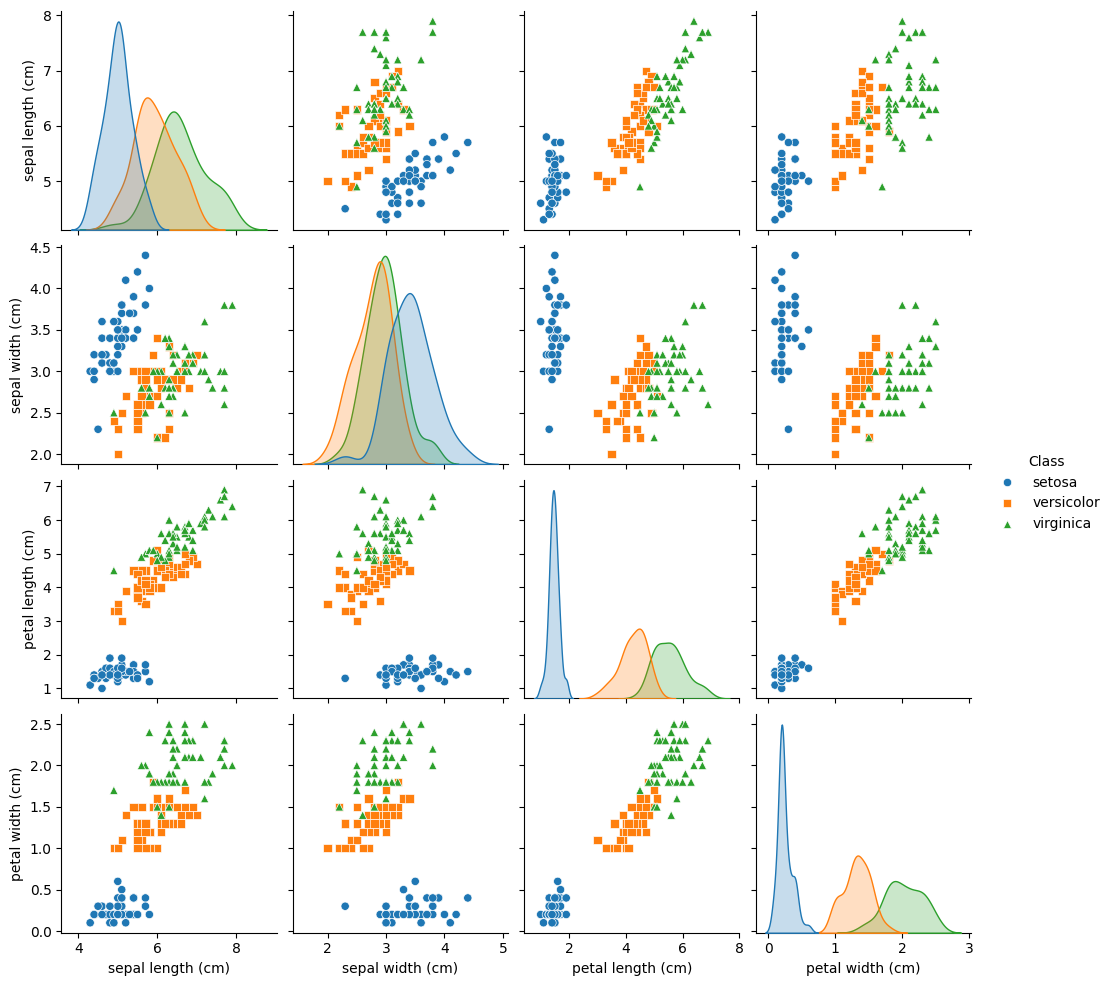

In [4]:
# Convert the dataset to a pandas DataFrame for easy visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df["Class"] = iris.target_names[y]

# Plot pair plots with class colors
sns.pairplot(df, hue="Class", markers=["o", "s", "^"])
plt.show()

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


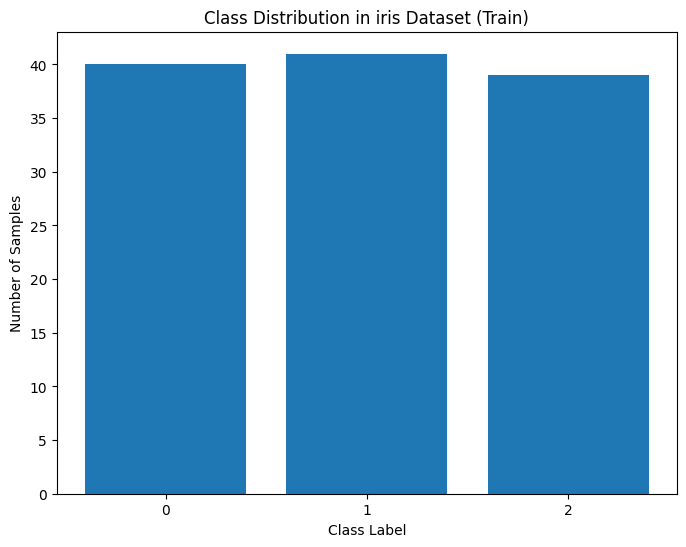

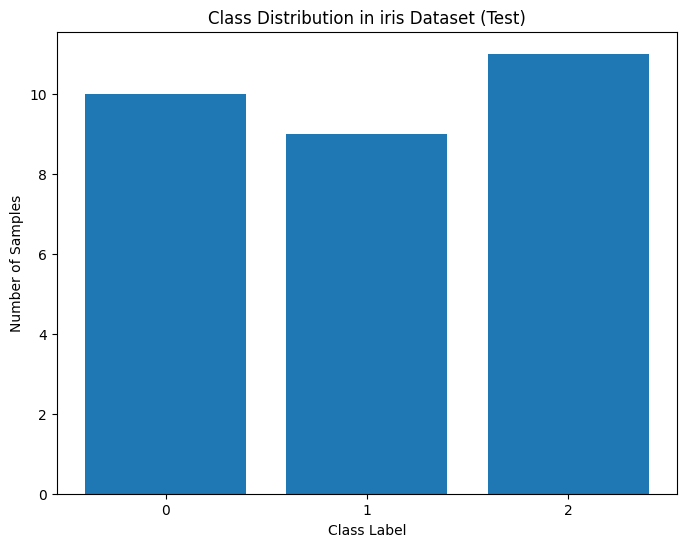

In [6]:
# Count the occurrences of each class label
class_counts_train = np.bincount(y_train)


# Generate class labels from 0 to 2
class_labels = np.arange(3)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_train, tick_label=class_labels, align="center")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in iris Dataset (Train)")
plt.show()


# Count the occurrences of each class label
class_counts_test = np.bincount(y_test)

# Generate class labels from 0 to 2
class_labels = np.arange(3)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_test, tick_label=class_labels, align="center")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in iris Dataset (Test)")
plt.show()


In [7]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_train.shape, y_test.shape)


# One-hot encode the target labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat.shape, y_test_cat.shape)

(120,) (30,)
(120, 3) (30, 3)


In [8]:
print(y_train[1], y_train_cat[1])
print(y_train[99], y_train_cat[99])
print(y_train[101], y_train_cat[101])

0 [1. 0. 0.]
1 [0. 1. 0.]
2 [0. 0. 1.]


In [9]:
# Build the neural network model
model = Sequential()
model.add(
    Dense(10, activation="relu", input_shape=(4,))
)  # since we have four features, input shape is  4
model.add(
    Dense(3, activation="softmax")
)  # since we have three clases output size is  3

# Visualize the model architecture
# Print the model summary
model.summary()


/Users/tony/arc/pro/dev/pydev/ptrn-labs/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3187 - loss: 1.3775 - val_accuracy: 0.4167 - val_loss: 1.2937
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2658 - loss: 1.3184 - val_accuracy: 0.4167 - val_loss: 1.2546
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: 1.2528 - val_accuracy: 0.4167 - val_loss: 1.2179
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 1.1920 - val_accuracy: 0.4167 - val_loss: 1.1856
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 1.1261 - val_accuracy: 0.4167 - val_loss: 1.1584
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5350 - loss: 1.1043 - val_accuracy: 0.5000 - val_loss: 1.1308
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5998 - loss: 1.0276 - val_accuracy: 0.5833 - val_loss: 1.1068
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5439 - loss: 1.0311 - val_accuracy: 0.5833 - val_loss:

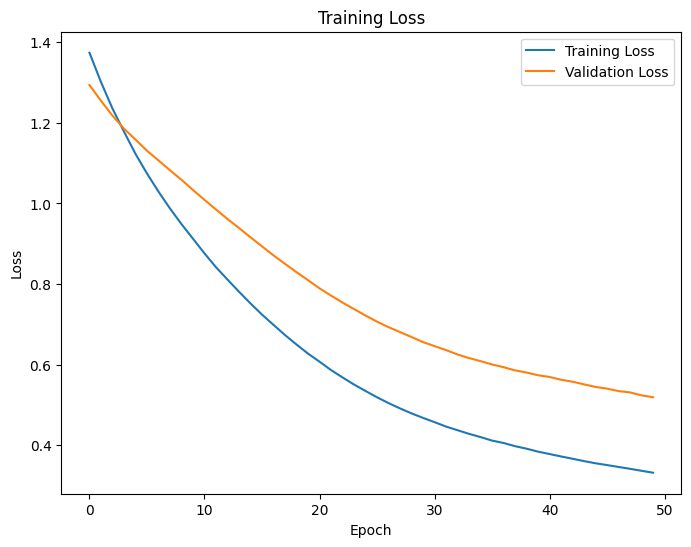

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9333 - loss: 0.2734
Test loss: 0.2734, Test accuracy: 0.9333


In [10]:
from tensorflow.keras.optimizers import Adam

# from tensorflow.keras.optimizers import SGD
# Compile the model


learning_rate = 0.001  # Example learning rate
# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
# Train the model and store the training history
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=8, validation_split=0.1)

# Plot training loss and accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss")
plt.show()


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)
Class Labels in Training Set: [0 1 2 3 4 5 6 7 8 9]
Class Labels in Test Set: [0 1 2 3 4 5 6 7 8 9]


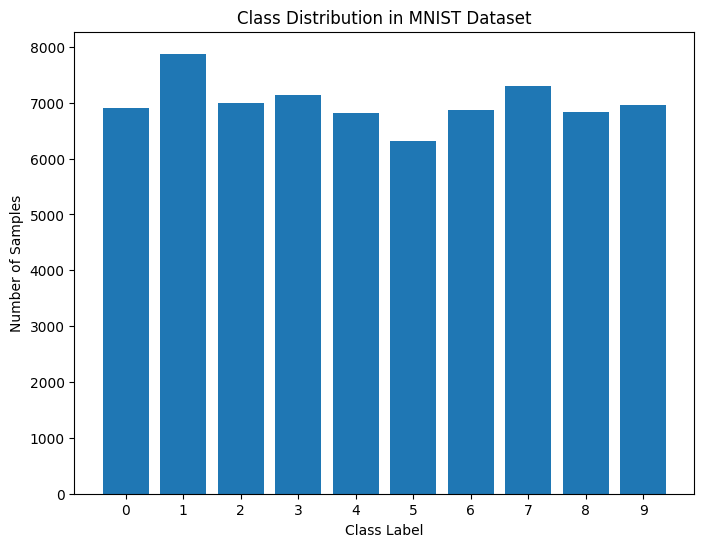

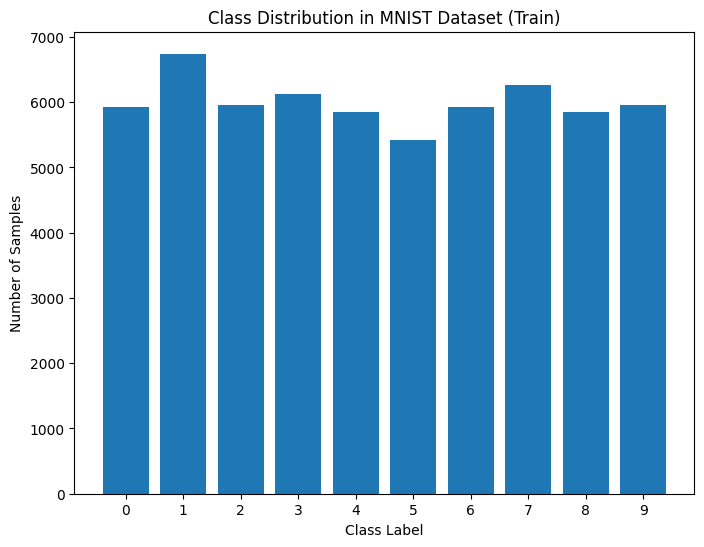

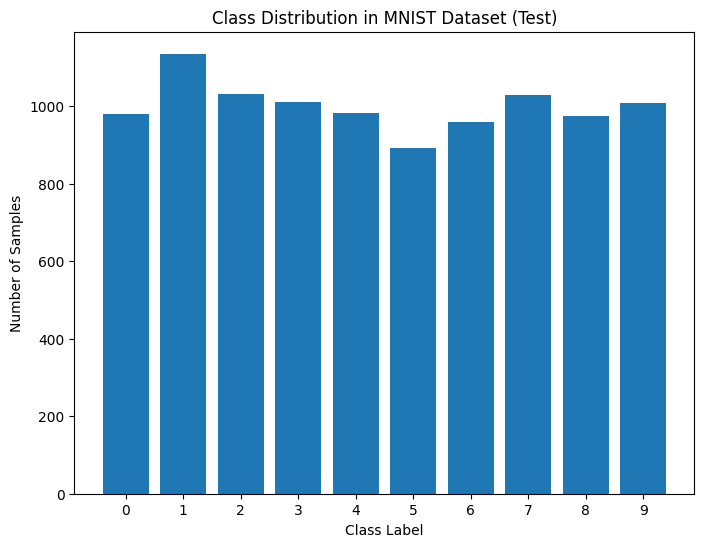

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Print all unique class labels in training set
unique_labels_train = np.unique(y_train)
print("Class Labels in Training Set:", unique_labels_train)

# Print all unique class labels in test set
unique_labels_test = np.unique(y_test)
print("Class Labels in Test Set:", unique_labels_test)


# Concatenate train and test labels to get the entire dataset
y_all = np.concatenate([y_train, y_test])

# Count the occurrences of each class label
class_counts = np.bincount(y_all)

# Generate class labels from 0 to 9
class_labels = np.arange(10)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, tick_label=class_labels, align="center")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in MNIST Dataset")
plt.show()


# Count the occurrences of each class label
class_counts_train = np.bincount(y_train)

# Generate class labels from 0 to 9
class_labels = np.arange(10)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_train, tick_label=class_labels, align="center")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in MNIST Dataset (Train)")
plt.show()


# Count the occurrences of each class label
class_counts_test = np.bincount(y_test)

# Generate class labels from 0 to 9
class_labels = np.arange(10)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_test, tick_label=class_labels, align="center")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in MNIST Dataset (Test)")
plt.show()


In [12]:
# Flatten the images into a 1D array
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


(60000, 784) (10000, 784)
(60000,) (10000,)


In [13]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(784,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Visualize the model architecture
# Print the model summary
model.summary()

/Users/tony/arc/pro/dev/pydev/ptrn-labs/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 515us/step - accuracy: 0.8632 - loss: 0.4398 - val_accuracy: 0.9648 - val_loss: 0.1114
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 531us/step - accuracy: 0.9650 - loss: 0.1148 - val_accuracy: 0.9745 - val_loss: 0.0932
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 562us/step - accuracy: 0.9746 - loss: 0.0825 - val_accuracy: 0.9758 - val_loss: 0.0831
Epoch 4/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 501us/step - accuracy: 0.9814 - loss: 0.0586 - val_accuracy: 0.9763 - val_loss: 0.0840
Epoch 5/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 509us/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9783 - val_loss: 0.0797
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 492us/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9783 - val_loss: 0.0745
Epoch 7/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 495us/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9802 - val_loss: 0.0783
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 499us/step - accuracy: 0.9929 -

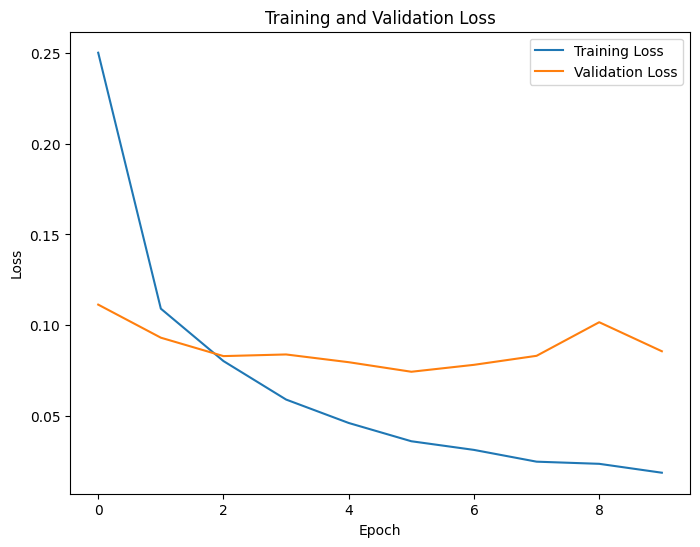

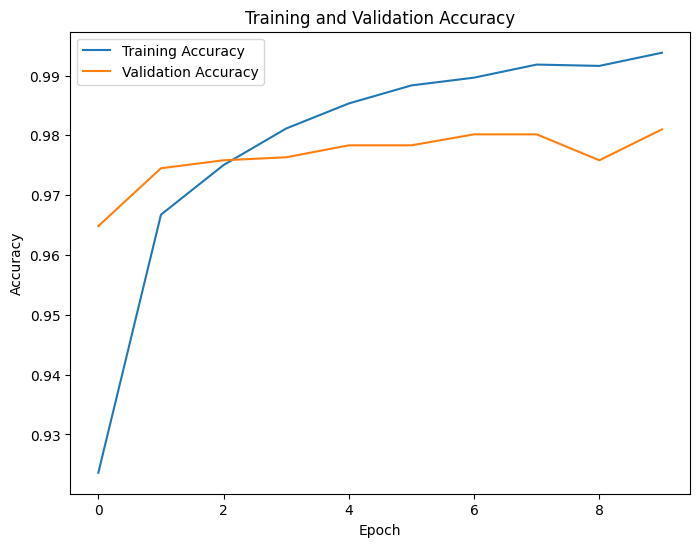

In [14]:
from tensorflow.keras.optimizers import SGD

# Compile the model
# Define the learning rate
learning_rate = 0.01  # Example learning rate

# Create an optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# Plot training loss and accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


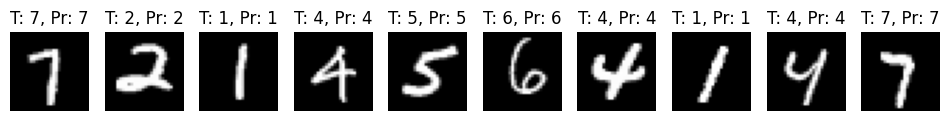

In [15]:
# Select random examples from the test set
num_examples = 10
random_indices = np.random.randint(0, len(X_test), num_examples)
X_examples = X_test[random_indices]
y_true = y_test[random_indices]

# Make predictions for the selected examples
y_pred = model.predict(X_examples)
y_pred_labels = np.argmax(y_pred, axis=1)

# Visualize the images and their true/predicted labels
plt.figure(figsize=(12, 6))
for i in range(num_examples):
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_examples[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"T: {np.argmax(y_true[i])}, Pr: {y_pred_labels[i]}")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


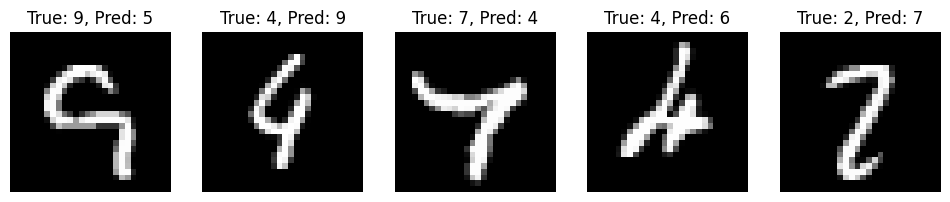

In [16]:
# Find the indices of wrong predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
wrong_indices = np.where(y_pred_labels != y_true_labels)[0]

# Visualize a few wrong predictions
num_examples = min(5, len(wrong_indices))
plt.figure(figsize=(12, 6))
for i in range(num_examples):
    index = wrong_indices[i]
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"True: {y_true_labels[index]}, Pred: {y_pred_labels[index]}")
plt.show()

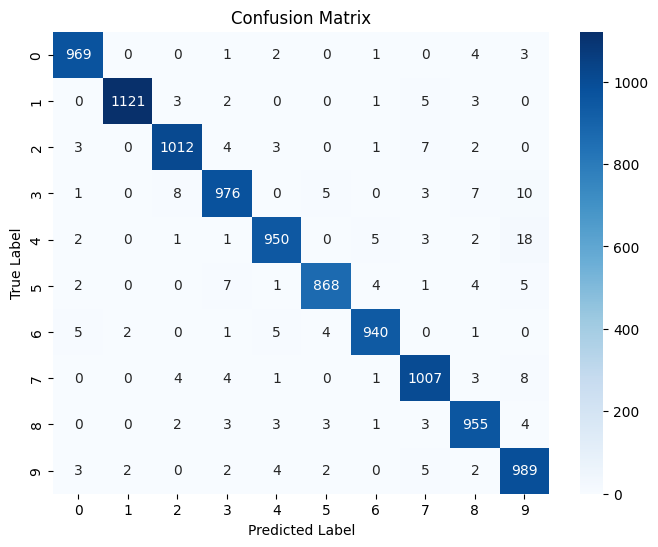

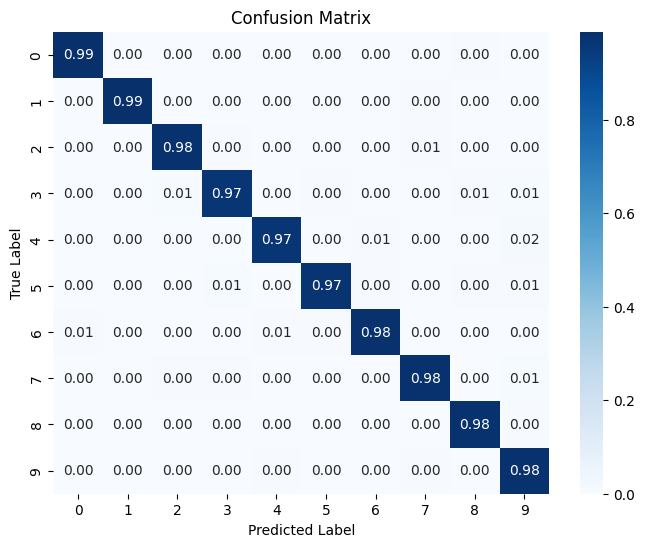

In [17]:
from sklearn.metrics import confusion_matrix

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Normalize the confusion matrix to get probabilities
conf_matrix_norm = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.yticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.show()


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.yticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.show()